In [2]:
import pandas as pd

movies_df = pd.read_csv("/content/tmdb_5000_movies.csv")
credits_df = pd.read_csv("/content/tmdb_5000_credits.csv")

# Quick look
print(movies_df.shape)
print(credits_df.shape)
movies_df.head(2)

(4803, 20)
(4803, 4)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
movies_df = movies_df.merge(credits_df, left_on='title', right_on='title', how='inner')

print(movies_df.shape)
movies_df.head(2)

(4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
import ast

# Convert JSON-like strings to Python lists
movies_df['genres'] = movies_df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
movies_df['cast'] = movies_df['cast'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)][:3])  # top 3 actors
movies_df['crew'] = movies_df['crew'].apply(lambda x: [i['name'] for i in ast.literal_eval(x) if i['job']=="Director"])

# Extract release year
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year


In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
all_genres = [genre for sublist in movies_df['genres'] for genre in sublist]
genre_count = Counter(all_genres)

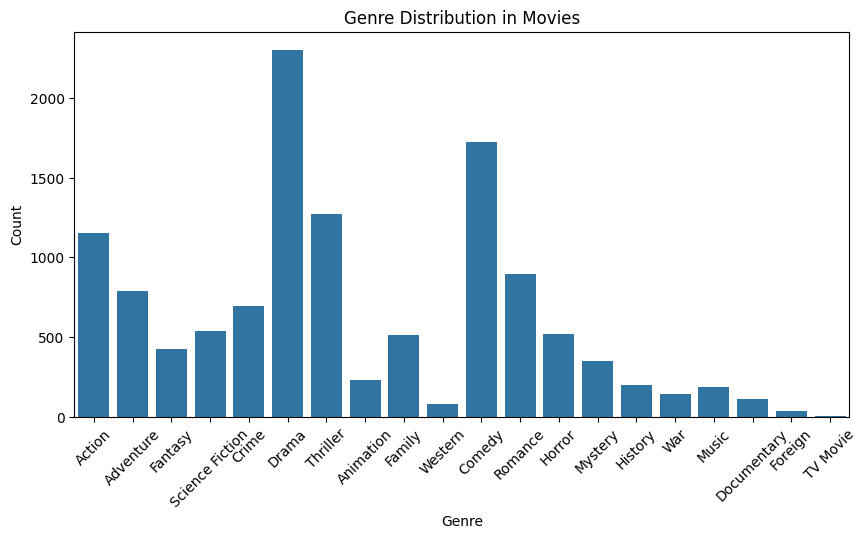

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()))
plt.xticks(rotation=45)
plt.title("Genre Distribution in Movies")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

Ratings Trend Over Years

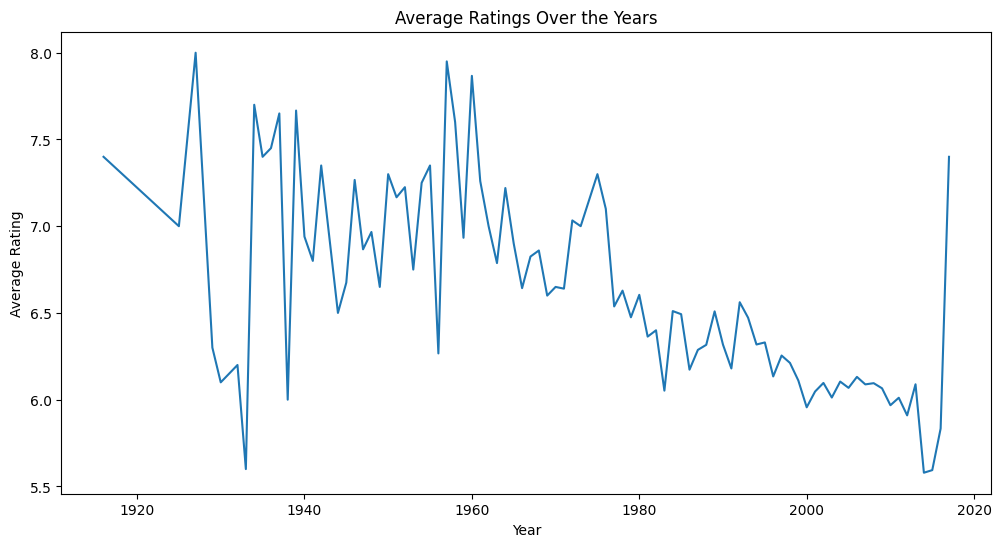

In [8]:
ratings_trend = movies_df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(12,6))
ratings_trend.plot()
plt.title("Average Ratings Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


 Budget vs Revenue

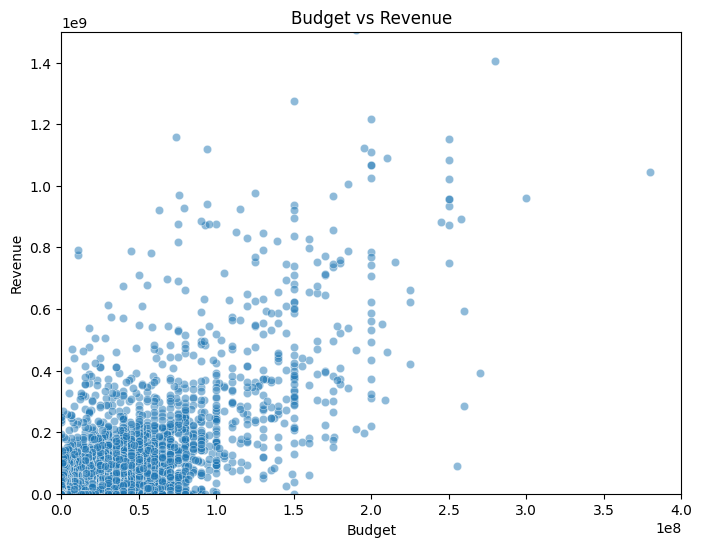

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="budget", y="revenue", data=movies_df, alpha=0.5)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 4e8)   # trimming outliers for better view
plt.ylim(0, 1.5e9)
plt.show()


Top Actors & Directors

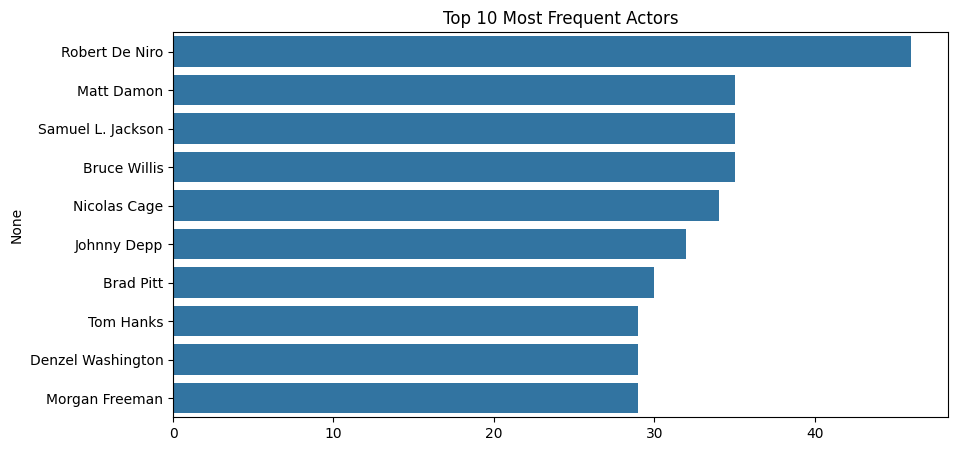

In [10]:
# Top 10 actors
all_actors = [actor for sublist in movies_df['cast'] for actor in sublist]
actor_count = pd.Series(all_actors).value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=actor_count.values, y=actor_count.index)
plt.title("Top 10 Most Frequent Actors")
plt.show()



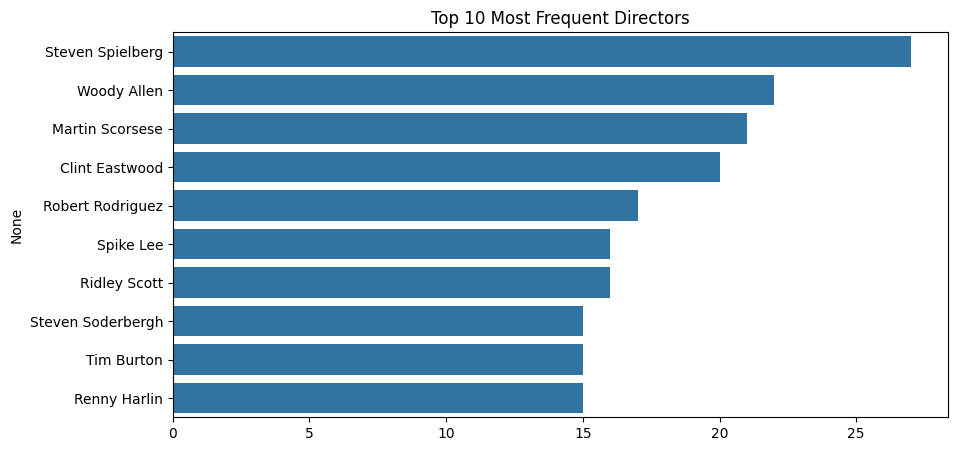

In [11]:

# Top 10 directors
all_directors = [d for sublist in movies_df['crew'] for d in sublist]
director_count = pd.Series(all_directors).value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=director_count.values, y=director_count.index)
plt.title("Top 10 Most Frequent Directors")
plt.show()

EDA-Based Recommendations

In [12]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.90)  # top 10% movies by vote count

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified = movies_df[movies_df['vote_count'] >= m].copy()
qualified['score'] = qualified.apply(weighted_rating, axis=1)



In [13]:
# Top 10 movies
top10 = qualified.sort_values('score', ascending=False).head(10)[['title','vote_average','vote_count','score']]
top10

,title,vote_average,vote_count,score
1883,The Shawshank Redemption,8.5,8205,8.058576
662,Fight Club,8.3,9413,7.938689
65,The Dark Knight,8.2,12002,7.919564
3235,Pulp Fiction,8.3,8428,7.904036
96,Inception,8.1,13752,7.862848
3340,The Godfather,8.4,5893,7.850454
95,Interstellar,8.1,10867,7.809015
809,Forrest Gump,8.2,7927,7.802587
329,The Lord of the Rings: The Return of the King,8.1,8064,7.726679
1992,The Empire Strikes Back,8.2,5879,7.697175


Top Movies by Genre

In [14]:
def top_movies_by_genre(genre, n=5):
    genre_movies = movies_df[movies_df['genres'].apply(lambda x: genre in x)]
    genre_movies = genre_movies[genre_movies['vote_count'] >= m].copy()
    genre_movies['score'] = genre_movies.apply(weighted_rating, axis=1)
    return genre_movies.sort_values('score', ascending=False).head(n)[['title','vote_average','vote_count','score']]




In [15]:
#Top 5 Action Movies
top_movies_by_genre("Action", 5)

,title,vote_average,vote_count,score
65,The Dark Knight,8.2,12002,7.919564
96,Inception,8.1,13752,7.862848
329,The Lord of the Rings: The Return of the King,8.1,8064,7.726679
1992,The Empire Strikes Back,8.2,5879,7.697175
262,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,7.666834


Best Movies After 2010

In [16]:
recent_movies = movies_df[(movies_df['release_year'] >= 2010) & (movies_df['vote_count'] >= m)].copy()
recent_movies['score'] = recent_movies.apply(weighted_rating, axis=1)

best_recent = recent_movies.sort_values('score', ascending=False).head(10)[['title','release_year','vote_average','vote_count','score']]
best_recent


,title,release_year,vote_average,vote_count,score
96,Inception,2010.0,8.1,13752,7.862848
95,Interstellar,2014.0,8.1,10867,7.809015
3870,Whiplash,2014.0,8.3,4254,7.632924
94,Guardians of the Galaxy,2014.0,7.9,9742,7.612561
77,Inside Out,2015.0,8.0,6560,7.581780
287,Django Unchained,2012.0,7.8,10099,7.536582
2524,The Imitation Game,2014.0,8.0,5723,7.535509
298,The Wolf of Wall Street,2013.0,7.9,6571,7.504223
693,Gone Girl,2014.0,7.9,5862,7.467801
1534,The Grand Budapest Hotel,2014.0,8.0,4519,7.447593


Best Movies of a Director

In [17]:
def top_movies_by_director(director, n=5):
    director_movies = movies_df[movies_df['crew'].apply(lambda x: director in x)]
    director_movies = director_movies[director_movies['vote_count'] >= 50]  # keep only valid movies
    return director_movies.sort_values('vote_average', ascending=False).head(n)[['title','release_year','vote_average','vote_count']]

# Example: Christopher Nolan
top_movies_by_director("Christopher Nolan", 5)


,title,release_year,vote_average,vote_count
65,The Dark Knight,2008.0,8.2,12002
95,Interstellar,2014.0,8.1,10867
96,Inception,2010.0,8.1,13752
3576,Memento,2000.0,8.1,4028
1197,The Prestige,2006.0,8.0,4391
